In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
col_names = ['age', 'workclass', 'fnlwgt','education', 'education-num', 
'marital-status', 'occupation', 'relationship', 'race', 'sex',
'capital-gain','capital-loss', 'hours-per-week','native-country', 'income']
df = pd.read_csv('adult.data', header=None, names = col_names)

In [4]:
#Distribution of income
print("Percentage of incomes under 50K: ", (df.income.value_counts()[0]/df.income.count() * 100).round(2), "%")

print("Percentage of incomes above 50K: ", (df.income.value_counts()[1]/df.income.count() * 100).round(2), "%")

Percentage of incomes under 50K:  75.92 %
Percentage of incomes above 50K:  24.08 %


In [5]:
#Clean columns by stripping extra whitespace for columns of type "object"
for i in df.select_dtypes(include = 'object').columns:
  df[i] = df[i].str.strip()

In [52]:
#Create feature dataframe X with feature columns and dummy variables for categorical features
feature_cols = df.select_dtypes(include = 'object').drop('income', axis = 1).columns
num_cols = df.select_dtypes(exclude = 'object').columns
X = pd.get_dummies(df[feature_cols], drop_first = True).join(df[num_cols])

In [53]:
#Create output variable y which is binary, 0 when income is less than 50k, 1 when it is greather than 50k
y = df.income.replace('>50K', 1).replace('<=50K', 0)

In [54]:
#Split data into a train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [55]:
#Instantiate random forest classifier, fit and score with default parameters
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
print("model method score: ", rfc.score(x_test, y_test))

model method score:  0.8595117457392907


In [56]:
#Tune the hyperparameter max_depth over a range from 1-25, save scores for test and train set
# np.random.seed(0)
accuracy_train= []
accuracy_test = []
for i in range(1, 26):
  rfc_depth = RandomForestClassifier(max_depth = i)
  rfc_depth.fit(x_train, y_train)
  accuracy_train.append(rfc_depth.score(x_train, y_train))
  accuracy_test.append(rfc_depth.score(x_test, y_test))

In [57]:
#Find the best accuracy and at what depth that occurs
print("Best train depth: ", max(accuracy_train), accuracy_train.index(max(accuracy_train)))
print("Best test depth: ", max(accuracy_test), accuracy_test.index(max(accuracy_test)))

Best train depth:  0.9546222358722358 24
Best test depth:  0.8713342545677875 20


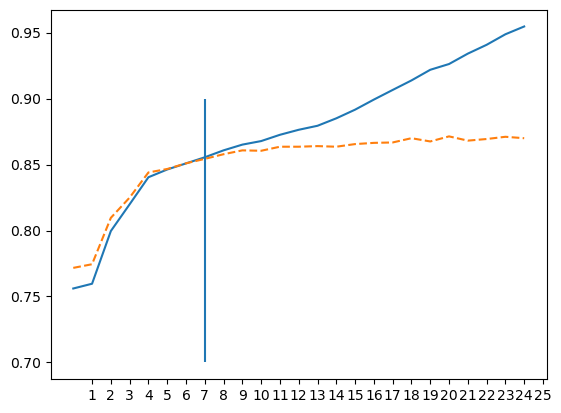

In [58]:
#Plot the accuracy scores for the test and train set over the range of depth values  
plt.plot(accuracy_train, "-")
plt.plot(accuracy_test, "--")
plt.xticks(range(1, 26, 1))
plt.vlines(7, 0.7, 0.9)
plt.show()

In [59]:
#Save the best random forest model and save the feature importances in a dataframe
best_rf = RandomForestClassifier(max_depth= 7)
best_rf.fit(x_train, y_train)
pd.Series(best_rf.feature_importances_, index = best_rf.feature_names_in_).sort_values(ascending=False).round(4)

marital-status_Married-civ-spouse    0.2231
capital-gain                         0.1684
marital-status_Never-married         0.1014
education-num                        0.0956
age                                  0.0465
                                      ...  
workclass_Without-pay                0.0000
native-country_Laos                  0.0000
native-country_Holand-Netherlands    0.0000
workclass_Never-worked               0.0000
occupation_Armed-Forces              0.0000
Length: 100, dtype: float64

In [65]:
#Create two new features, based on education
df['education_bin'] = df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th'], 'High school and less').replace(['Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors'], 'College to Bachelors').replace(['Masters', 'Doctorate'], 'Masters and more')

feature_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'sex', 'race','education_bin']

In [66]:
#Use these two new additional features and recreate X and test/train split
feature_cols_new = df[feature_cols].select_dtypes(include = 'object').columns
num_cols = df[feature_cols].select_dtypes(exclude = 'object').columns
X = pd.get_dummies(df[feature_cols_new], drop_first = True).join(df[num_cols])

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [68]:
#Find the best max depth now with the additional two features
accuracy_train= []
accuracy_test = []
for i in range(1, 26):
  rfc_new = RandomForestClassifier(max_depth = i)
  rfc_new.fit(x_train, y_train)
  accuracy_train.append(rfc_new.score(x_train, y_train))
  accuracy_test.append(rfc_new.score(x_test, y_test))

In [69]:
print("Best train depth: ", max(accuracy_train), accuracy_train.index(max(accuracy_train)))
print("Best test depth: ", max(accuracy_test), accuracy_test.index(max(accuracy_test)))

Best train depth:  0.8652871621621622 24
Best test depth:  0.8295716259788116 16


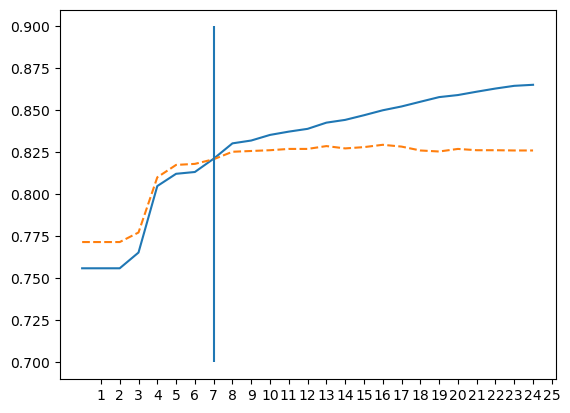

In [70]:
plt.plot(accuracy_train, "-")
plt.plot(accuracy_test, "--")
plt.xticks(range(1, 26, 1))
plt.vlines(7, 0.7, 0.9)
plt.show()

In [71]:
#Save the best model and print the two features with the new feature set
best_rf = RandomForestClassifier(max_depth= 7)
best_rf.fit(x_train, y_train)
pd.Series(best_rf.feature_importances_, index = best_rf.feature_names_in_).sort_values(ascending=False).round(4)

marital-status_Married-civ-spouse    0.2976
marital-status_Never-married         0.1630
occupation_Exec-managerial           0.0604
sex_Male                             0.0558
occupation_Prof-specialty            0.0515
                                      ...  
native-country_Honduras              0.0000
workclass_Never-worked               0.0000
native-country_Holand-Netherlands    0.0000
workclass_Without-pay                0.0000
occupation_Armed-Forces              0.0000
Length: 94, dtype: float64